# PHYS 225
## Intro to Computational Physics
### 9-18-2020

# Outline

* How does an accelerometer sensor work? 
* Interpretting elevator data
* Subsetting data based on time
* Numerical integration
* numpy array functions (sum, prod, cumsum, cumprod)



## How do accelerometer sensor work?
Watch [The Engineering Guy's YouTube video](https://youtu.be/KZVgKu6v808)

<img src="Accelerometer_demo.PNG" alt="Accelerometer demo" width="450">

#### Breakout room discussion
1. Why does the accelerometer measure $a = 9.8 \textrm{m/s}^2$ even when the phone is at rest?
1. Why does the accelerometer measure $\vec{a} = 0$ when the phone is tossed in the air or dropped?

## Einstein's general equivalence

*we ... assume the complete physical equivalence of a gravitational field and a corresponding acceleration of the reference system.*

— Einstein, 1907

[Wikipedia on the equivalence principle](https://en.wikipedia.org/wiki/Equivalence_principle)  
[General Relativity from Dummies.com](https://www.dummies.com/education/science/physics/einsteins-general-relativity-theory-gravity-as-acceleration/)

![Equivalence principle](Equivalence_principle.jpg)

## Einstein's general equivalence
An elevator in free-fall is a "local" inertial reference frame.

## Using a capacitor to sense displacement
Show that as the center element moves, more charge goes the the closer side, so current flows, which is measurable.
<img src="MEMS_device.PNG" alt="MEMS Accelerometer" width="600">  

## Differential Capacitor
<img src="Diff_capacitor.PNG" alt="Differential capacitor to sense displacement" width="600"> 
Work through some math...

## A new way to subset without indices! 
Subsetting data based on time values

In [13]:
# import the data from my_acceleration_data.csv
# create a plot
import numpy as np
import matplotlib.pyplot as plt

(0.0, 40.0)

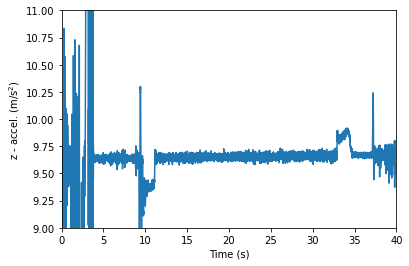

In [17]:
my_acc = np.loadtxt("my_acceleration_data.csv", delimiter=",", skiprows=1)

plt.plot(my_acc[:,0], my_acc[:,3])  # pick time column and z-acceleration
plt.xlabel("Time (s)")
plt.ylabel("z - accel. (m/s$^2$)")
plt.ylim(9,11)
plt.xlim(0,40)
#plt.savefig("a_vs_t.png")

# What happened in the elevator data?
![acceleration vs time for elevator](a_vs_t_annotated.png)
A. The elevator was at rest, and started moving upward  
B. The elevator was at rest, and started moving downward

## Figuring out velocity based on the acceleration

$$a_z = \frac{dv_z}{dt}$$
$$v_z = \int_0^t a_z(t')dt'$$

![Clicker on velocity vs time for elevator](Clicker1.png)

### Challenge: The constant background of $g \approx 9.8 \textrm{m/s}^2$ must be subtracted from $a_z$.

(0.0, 40.0)

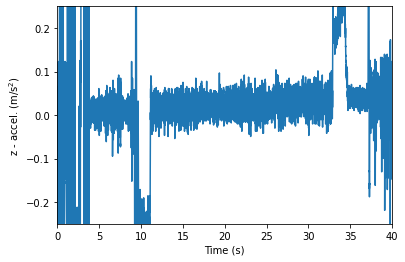

In [22]:
g_sub = 9.63 # approximate value of g to subtract off

t = my_acc[:,0]    # time column of data (s)
az_sub = my_acc[:,3] - g_sub   # az column with g subtracted (m/s^2)

plt.plot(t, az_sub)  # pick time column and z-acceleration
plt.xlabel("Time (s)")
plt.ylabel("z - accel. (m/s$^2$)")
plt.ylim(-0.25,0.25)
plt.xlim(0,40)
#plt.savefig("a_vs_t.png")

### Picking out subset of data when elevator starts moving
Roughly 5-15 seconds contains the acceleration period, plus a few seconds on either side.

In [29]:
t = my_acc[:,0]  # define the t array

condition1 = t < 15   # boolean array of true/false values
print(condition1[-5:-1])            # print first 5 elements

condition2 = t > 5            # set up condition 2
print(condition2[0:5])            # print first 5 elements
            
# true when both conditions are met, false otherwise
# try to use and operator...it makes an error
condition = np.logical_and(condition1,  condition2)
# define condition using np.logical_and operator


print("Length of array t = ", len(t) ) 
print("Length of array t[condition] = ", len( t[condition] ) )

[False False False False]
[False False False False False]
Length of array t =  38829
Length of array t[condition] =  4277


(0.0, 40.0)

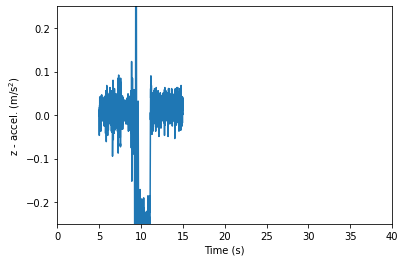

In [30]:
# Make a plot of the subset given by condition
plt.plot(t[condition], az_sub[condition])  # pick time column and z-acceleration
plt.xlabel("Time (s)")
plt.ylabel("z - accel. (m/s$^2$)")
plt.ylim(-0.25,0.25)
plt.xlim(0,40)

##  Are we ready to integrate?
1. $g$ is subtracted!
2. Subset of data is chosen (see [numpy.logical_and](https://numpy.org/doc/stable/reference/generated/numpy.logical_and.html) )
3. PS5B will be on numerical integration

### A few remarks on numerical integration (jump to doc cam)


## Introduction to a few new numpy functions
### Cumulative sum function

In [24]:
x = np.arange(0,10)
print(x)
print(x.sum())
print(x.cumsum())

[0 1 2 3 4 5 6 7 8 9]
45
[ 0  1  3  6 10 15 21 28 36 45]


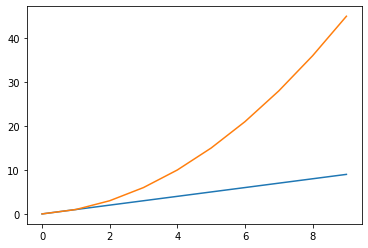

In [25]:
plt.plot(x,x)
plt.plot(x,x.cumsum())